In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn statsmodels openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import openpyxl


### Data Orientation

In [10]:
# split excel into multiple sheets
excel_file = 'data/raw/data.xlsx'
dir_name = 'data/raw'
xls = pd.ExcelFile(excel_file)

# load each sheet into a dataframe
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    csv_file = f"{dir_name}/{sheet_name}.csv"
    df.to_csv(csv_file, index=False)
    print(f"Saved sheet: {sheet_name}")


Saved sheet: historical data
Saved sheet: data_to_predict


In [11]:
# let's take a look at the data
historical_df = pd.read_csv('data/raw/historical_data.csv')
historical_df.head()


,impressions,clicks,eDate,channel,country,os,networkType,deviceType,publisherCategory,advertiserCategory,product,subProduct,campaign,advPackage,advMaturity,AverageWinPrice (CPM),rate
0,9,0,2017-12-09,inr,AU,android,3g,mobile,game_arcade,entertainment,600775.0,NaN,301059092,NaN,low maturity,1.404217,0.140000
1,6,0,2017-12-09,inr,ES,android,3g,mobile,game_casual,game_educational,640029.0,com.mohitdev.minebuild,300208158,NaN,low maturity,0.575850,0.030000
2,57,0,2017-12-09,inr,FR,android,3g,mobile,game_word,game_action,618417.0,com.etermax.apalabrados.lite,300038580,NaN,low maturity,0.052181,0.017333
3,22,2,2017-12-09,inr,IT,android,3g,mobile,game_adventure,entertainment,631206.0,com.secg.robocraft,301068023,NaN,low maturity,0.265992,0.021000
4,3,0,2017-12-09,inr,IT,android,3g,mobile,game_arcade,entertainment,632417.0,com.craftpixelstudio.cubelands,300222537,NaN,low maturity,0.676667,0.035000


In [23]:
# let's take a statistical summary of the data
historical_df.describe(include='all')


,impressions,clicks,eDate,channel,country,os,networkType,deviceType,publisherCategory,advertiserCategory,product,subProduct,campaign,advPackage,advMaturity,AverageWinPrice (CPM),rate
count,304629.000000,304629.000000,304629,304629,304618,304629,304629,304629,253895,299908,2.400300e+05,251823,302951,76388,304628,304629.000000,304629.000000
unique,NaN,NaN,8,5,53,2,4,2,47,38,NaN,875,370,65,12,NaN,NaN
top,NaN,NaN,2017-12-11,mpb,ZA,android,3g,mobile,game_puzzle,entertainment,NaN,1075264954,300798390,com.p74.player,low maturity,NaN,NaN
freq,NaN,NaN,40739,172588,48404,281007,204345,295987,31406,139492,NaN,2779,7335,10025,187226,NaN,NaN
mean,88.306632,0.761815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.370810e+08,NaN,NaN,NaN,NaN,0.207046,0.027231
std,1193.871334,12.364807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.842803e+08,NaN,NaN,NaN,NaN,0.332051,0.027564
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.627600e+04,NaN,NaN,NaN,NaN,0.007190,0.003000
25%,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.872324e+06,NaN,NaN,NaN,NaN,0.050000,0.011000
50%,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.058059e+08,NaN,NaN,NaN,NaN,0.105240,0.020000
75%,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.219066e+09,NaN,NaN,NaN,NaN,0.207143,0.030000


In [12]:
data_to_predict_df = pd.read_csv('data/raw/data_to_predict.csv')
data_to_predict_df.head()

,sessionId,eDate,channel,country,os,networkType,deviceType,publisherCategory,advertiserCategory,product,subProduct,campaign,advPackage,advMaturity,rate
0,9705699729732200,2017-12-17,smt,BR,ios,unknown,mobile,NaN,education,130000706,319881193,301604736,com.kawecki.onemind,4+,0.010
1,12802690671750800,2017-12-17,smt,KH,android,3g,mobile,music & audio,entertainment,130167110,com.fundevs.app.mediaconverter,300988528,NaN,low maturity,0.008
2,21347409150256300,2017-12-17,smt,ID,ios,not_wifi,mobile,NaN,travel,130285027,com.alcaydevs.idlfree,300228923,com.go-jek.ios,4+,0.020
3,23329125091887800,2017-12-17,inr,RU,android,3g,mobile,social,music & audio,625569,drug.vokrug,301060338,com.p74.player,parental guidance,0.022
4,28266843791174100,2017-12-17,smt,DE,android,wifi,mobile,photography,NaN,130356465,com.photo.editor.cartoon,301011313,NaN,everyone,0.025


In [14]:
# dataframe dimensions
print(f"This dataframe has {historical_df.shape[0]} rows and {historical_df.shape[1]} columns.")
historical_df.info()

This dataframe has 304629 rows and 17 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304629 entries, 0 to 304628
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   impressions            304629 non-null  int64  
 1   clicks                 304629 non-null  int64  
 2   eDate                  304629 non-null  object 
 3   channel                304629 non-null  object 
 4   country                304618 non-null  object 
 5   os                     304629 non-null  object 
 6   networkType            304629 non-null  object 
 7   deviceType             304629 non-null  object 
 8   publisherCategory      253895 non-null  object 
 9   advertiserCategory     299908 non-null  object 
 10  product                240030 non-null  float64
 11  subProduct             251823 non-null  object 
 12  campaign               302951 non-null  object 
 13  advPackage             76388 non-null   ob

In [26]:
# let's look at the distribution of our categorical variables
for column in historical_df.columns:
    if historical_df[column].dtype == 'object':
        print(f"Distribution of {column}:")
        print(historical_df[column].value_counts())
        print("\n")


Distribution of eDate:
eDate
2017-12-11    40739
2017-12-13    39743
2017-12-16    39000
2017-12-12    38743
2017-12-14    38546
2017-12-09    37791
2017-12-10    36090
2017-12-15    33977
Name: count, dtype: int64


Distribution of channel:
channel
mpb    172588
inr     72340
smt     49929
nxg      9495
rub       277
Name: count, dtype: int64


Distribution of country:
country
ZA    48404
JP    46055
ES    27456
RU    26017
PL    17768
FR    11087
IT     9515
BR     9087
MM     8869
AE     8582
US     5925
AU     5829
KR     5520
PA     4926
EG     4125
TN     4115
ID     3853
PT     3754
OM     3407
CL     3230
BH     2932
DE     2930
DZ     2799
GB     2793
MA     2558
NG     2534
HK     2471
KH     2435
VN     2382
KW     2341
TR     2064
NO     1942
MX     1675
RS     1665
NL     1586
IN     1536
SN     1271
DO     1245
SG     1121
PY      962
TH      916
HN      842
CA      738
MY      590
PH      577
AT      551
PK      512
HU      415
QA      247
TW      205
CR      130
SA     

### Preprocessing & EDA 

Removing outliers, missing values, etc.

Encoding of categorical variables to numbers

Declaring our target features.



In [34]:
# missing values summary
def missing_values_summary(df): 
    return pd.DataFrame(
        zip(
            df.columns,
            df.isna().any(),
            (df.isna().sum() / df.shape[0] * 100).round(2),
            df.dtypes,
            df.apply(lambda x: x.sample(n=1).iloc[0] if len(x) > 0 else None)),
        columns=['Column', 'Has Missing Values', '% Missing Values', 'Feature Type', 'Sample Value']
    )

missing_values_summary(historical_df)


,Column,Has Missing Values,% Missing Values,Feature Type,Sample Value
0,impressions,False,0.00,int64,144
1,clicks,False,0.00,int64,0
2,eDate,False,0.00,object,2017-12-11
3,channel,False,0.00,object,mpb
4,country,True,0.00,object,ES
5,os,False,0.00,object,ios
6,networkType,False,0.00,object,wifi
7,deviceType,False,0.00,object,mobile
8,publisherCategory,True,16.65,object,entertainment
9,advertiserCategory,True,1.55,object,entertainment


In [39]:
# Let's drop the columns with more than 50% missing values
# remember that we process this on a COPY of our original dataframe
historical_eda_df = historical_df.drop(columns=['advPackage'])

# now let's convert the objects or floats to the correct type which is string
historical_eda_df['product'] = historical_eda_df['product'].round(0).astype(str)
historical_eda_df['campaign'] = historical_eda_df['campaign'].astype(str)

# Let's let's replace the missing values for the rest of the values less than 50% missing values with placeholder values
# this will be categorical variables so we will want to exclude these from our first couple of iterations since it's as to the product
historical_categorical_cols_imputed = ['publisherCategory', 'advertiserCategory', 'subProduct', 'campaign', 'product']
for col in historical_categorical_cols_imputed:
    historical_eda_df[col] = historical_eda_df[col].fillna('missing')


missing_values_summary(historical_eda_df)

,Column,Has Missing Values,% Missing Values,Feature Type,Sample Value
0,impressions,False,0.0,int64,517
1,clicks,False,0.0,int64,0
2,eDate,False,0.0,datetime64[ns],2017-12-10 00:00:00
3,channel,False,0.0,object,inr
4,country,True,0.0,object,PY
5,os,False,0.0,object,android
6,networkType,False,0.0,object,wifi
7,deviceType,False,0.0,object,mobile
8,publisherCategory,False,0.0,object,missing
9,advertiserCategory,False,0.0,object,entertainment


### Visualization Methods

<Axes: ylabel='Density'>

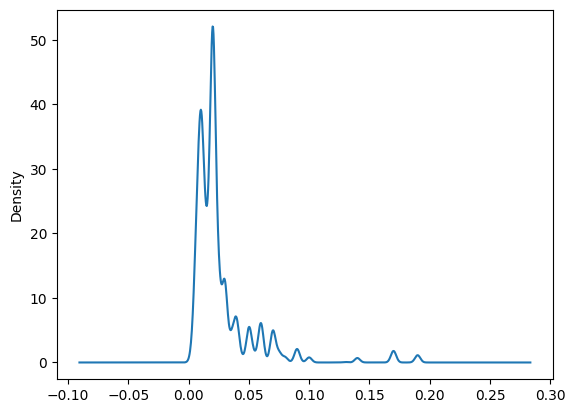

In [43]:
def plot_categorical_distribution(df, col):
    return df[col].value_counts().plot(kind='bar')

def plot_quantified_metrics(df, col):
    return df[col].plot(kind='line')

def plot_quantified_metrics_with_date(df, col):
    return df.plot(kind='line', x='eDate', y=col)

def summary_statistics(df, cols):
    return df[cols].describe()

def density_plot(df, col):
    return df[col].plot(kind='density')

def plot_correlation_matrix_of_numerical_features(df, cols):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, 1))
    plt.show()

def plot_correlation_matrix_of_categorical_features(df, cols):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, 1))
    plt.show()
    

### Simplifying our dataframe for visualization and eventual modeling

Summary of the features we're keeping and their distribution.  Here are our splits:
# 
| Feature Group | Features |
|--------------|----------|
| Quantified Metrics  | impressions, clicks, CTR (to create), AverageWinPrice (CPM), rate |
| Channel & Location    | channel, country, os, networkType, deviceType, AverageWinPrice (CPM), rate |
| Quantified with Date         | impressions, clicks, CTR (to create), AverageWinPrice (CPM), rate |
| Advertiser & Product      | advMaturity, publisherCategory, advertiserCategory, product, subProduct, campaign, AverageWinPrice (CPM), rate |



In [ ]:
# here is where we will pass in our different tiny-dataframes into our created methods for visualization

### Split data into training and testing sets

### Modeling


### Evaluation